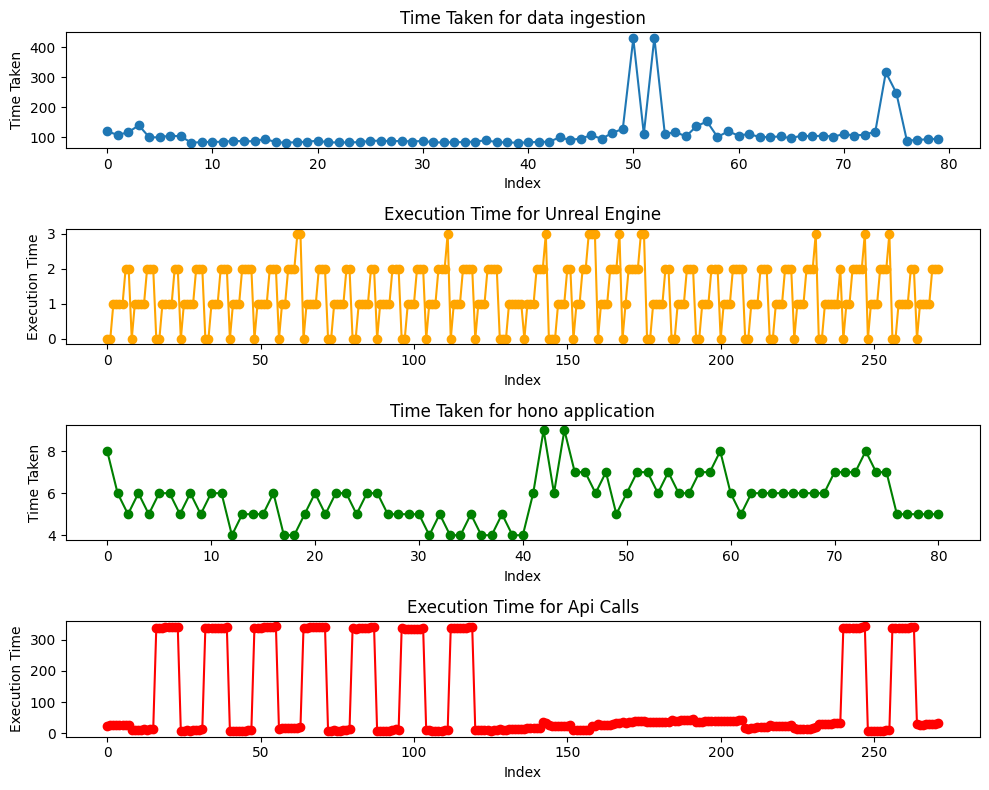

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read CSV files
curl_times_df = pd.read_csv('curl_times.csv')
execution_time_df = pd.read_csv('ExecutionTime.csv')
output_df = pd.read_csv('output.csv')
data_polling_df = pd.read_csv('DataPollingTime.csv')

# Convert boolean values in curl_times_sanitized_df to match ExecutionTime.csv format
execution_time_df['value'] = execution_time_df['value'].replace({'true': 'True', 'false': 'False'})

# Plotting the uncleaned data
plt.figure(figsize=(10, 8))

# Plot for curl_times.csv
plt.subplot(4, 1, 1)
plt.plot(curl_times_df['time_taken'], marker='o')
plt.title('Time Taken for data ingestion')
plt.xlabel('Index')
plt.ylabel('Time Taken')

# Plot for ExecutionTime.csv
plt.subplot(4, 1, 2)
plt.plot(execution_time_df['exeution_time'], marker='o', color='orange')
plt.title('Execution Time for Unreal Engine')
plt.xlabel('Index')
plt.ylabel('Execution Time')

# Plot for output.csv
plt.subplot(4, 1, 3)
plt.plot(output_df['time_taken'], marker='o', color='green')
plt.title('Time Taken for hono application')
plt.xlabel('Index')
plt.ylabel('Time Taken')

# Plot for DataPollingTime.csv
plt.subplot(4, 1, 4)
plt.plot(data_polling_df['exeution_time'], marker='o', color='red')
plt.title('Execution Time for Api Calls')
plt.xlabel('Index')
plt.ylabel('Execution Time')

plt.tight_layout()
plt.show()

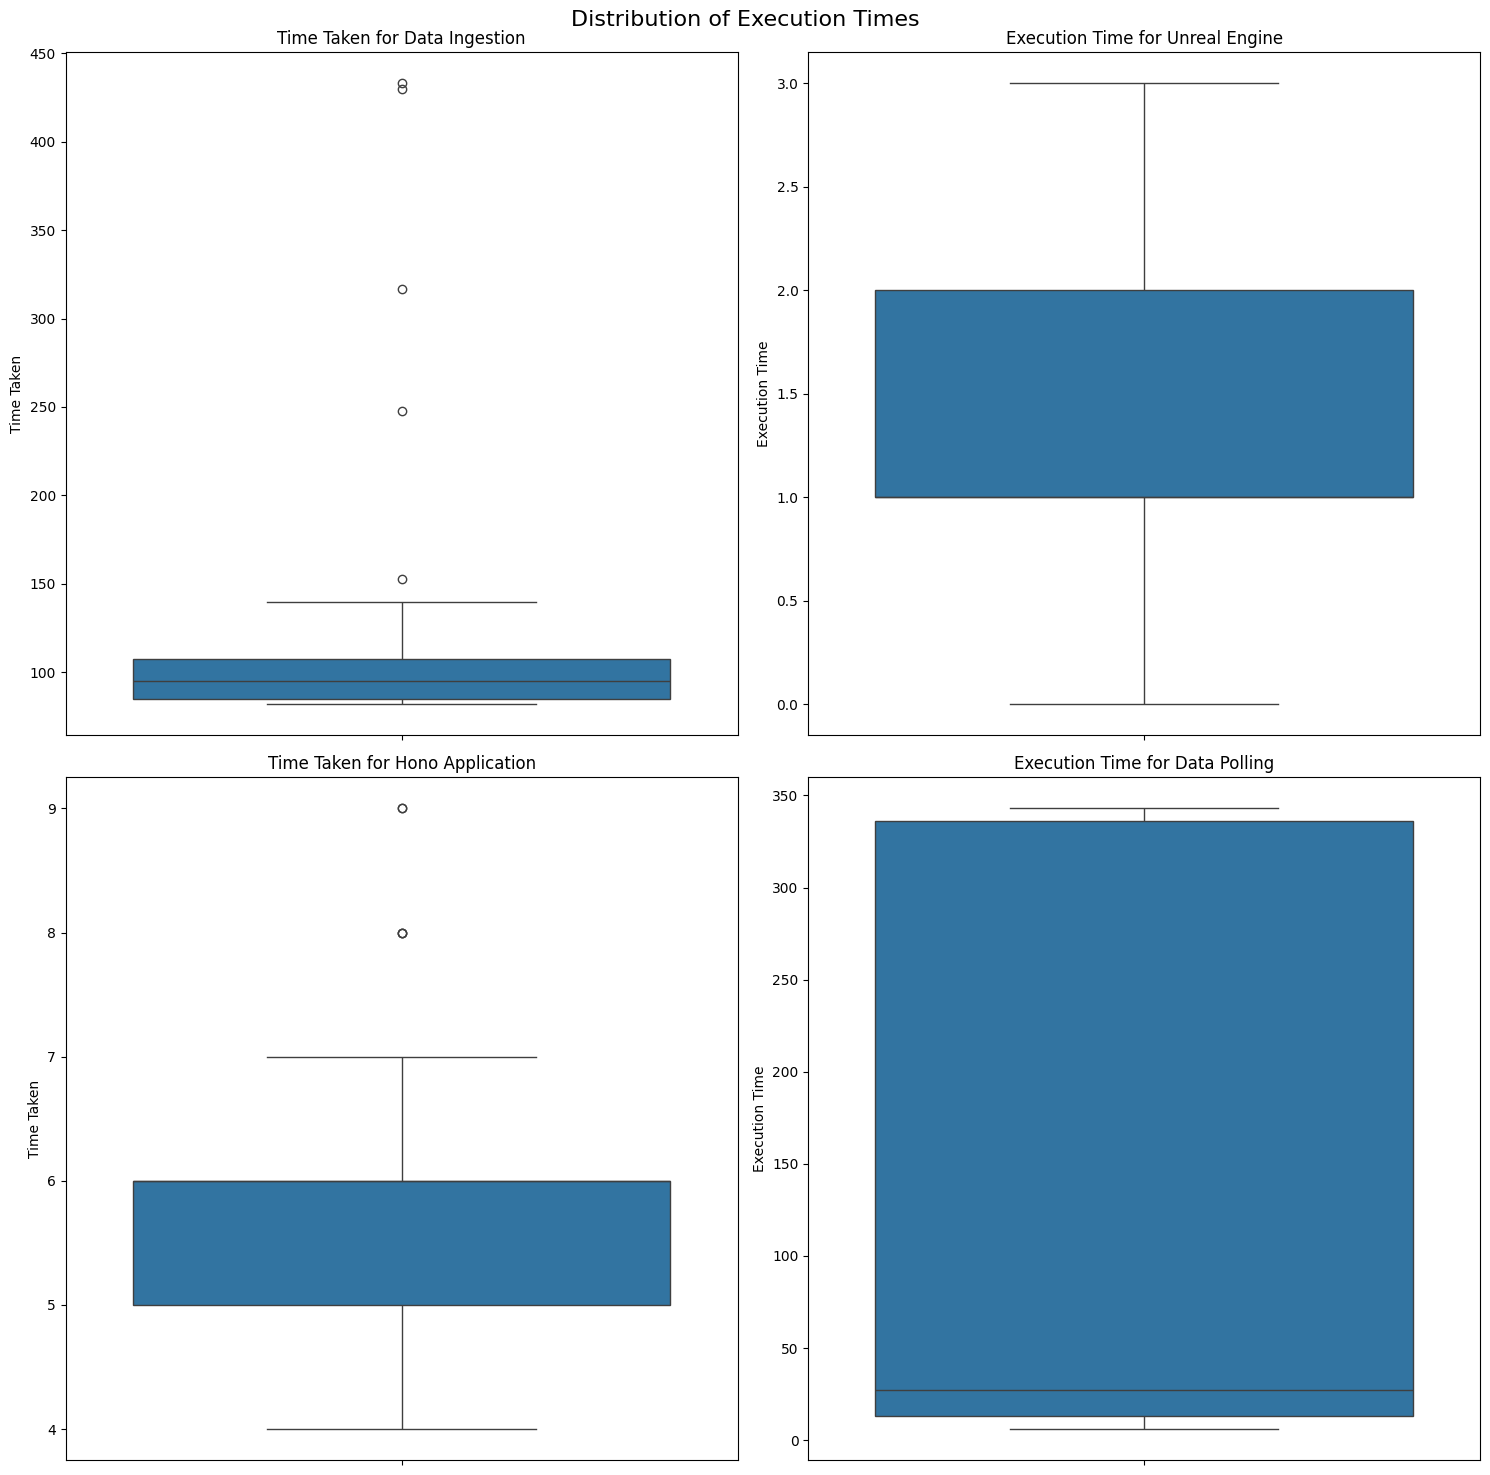

In [2]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Distribution of Execution Times', fontsize=16)

# Box plot for curl_times.csv
sns.boxplot(y=curl_times_df['time_taken'], ax=axs[0, 0])
axs[0, 0].set_title('Time Taken for Data Ingestion')
axs[0, 0].set_ylabel('Time Taken')

# Box plot for ExecutionTime.csv
sns.boxplot(y=execution_time_df['exeution_time'], ax=axs[0, 1])
axs[0, 1].set_title('Execution Time for Unreal Engine')
axs[0, 1].set_ylabel('Execution Time')

# Box plot for output.csv
sns.boxplot(y=output_df['time_taken'], ax=axs[1, 0])
axs[1, 0].set_title('Time Taken for Hono Application')
axs[1, 0].set_ylabel('Time Taken')

# Box plot for DataPollingTime.csv
sns.boxplot(y=data_polling_df['exeution_time'], ax=axs[1, 1])
axs[1, 1].set_title('Execution Time for Data Polling')
axs[1, 1].set_ylabel('Execution Time')

plt.tight_layout()
plt.show()

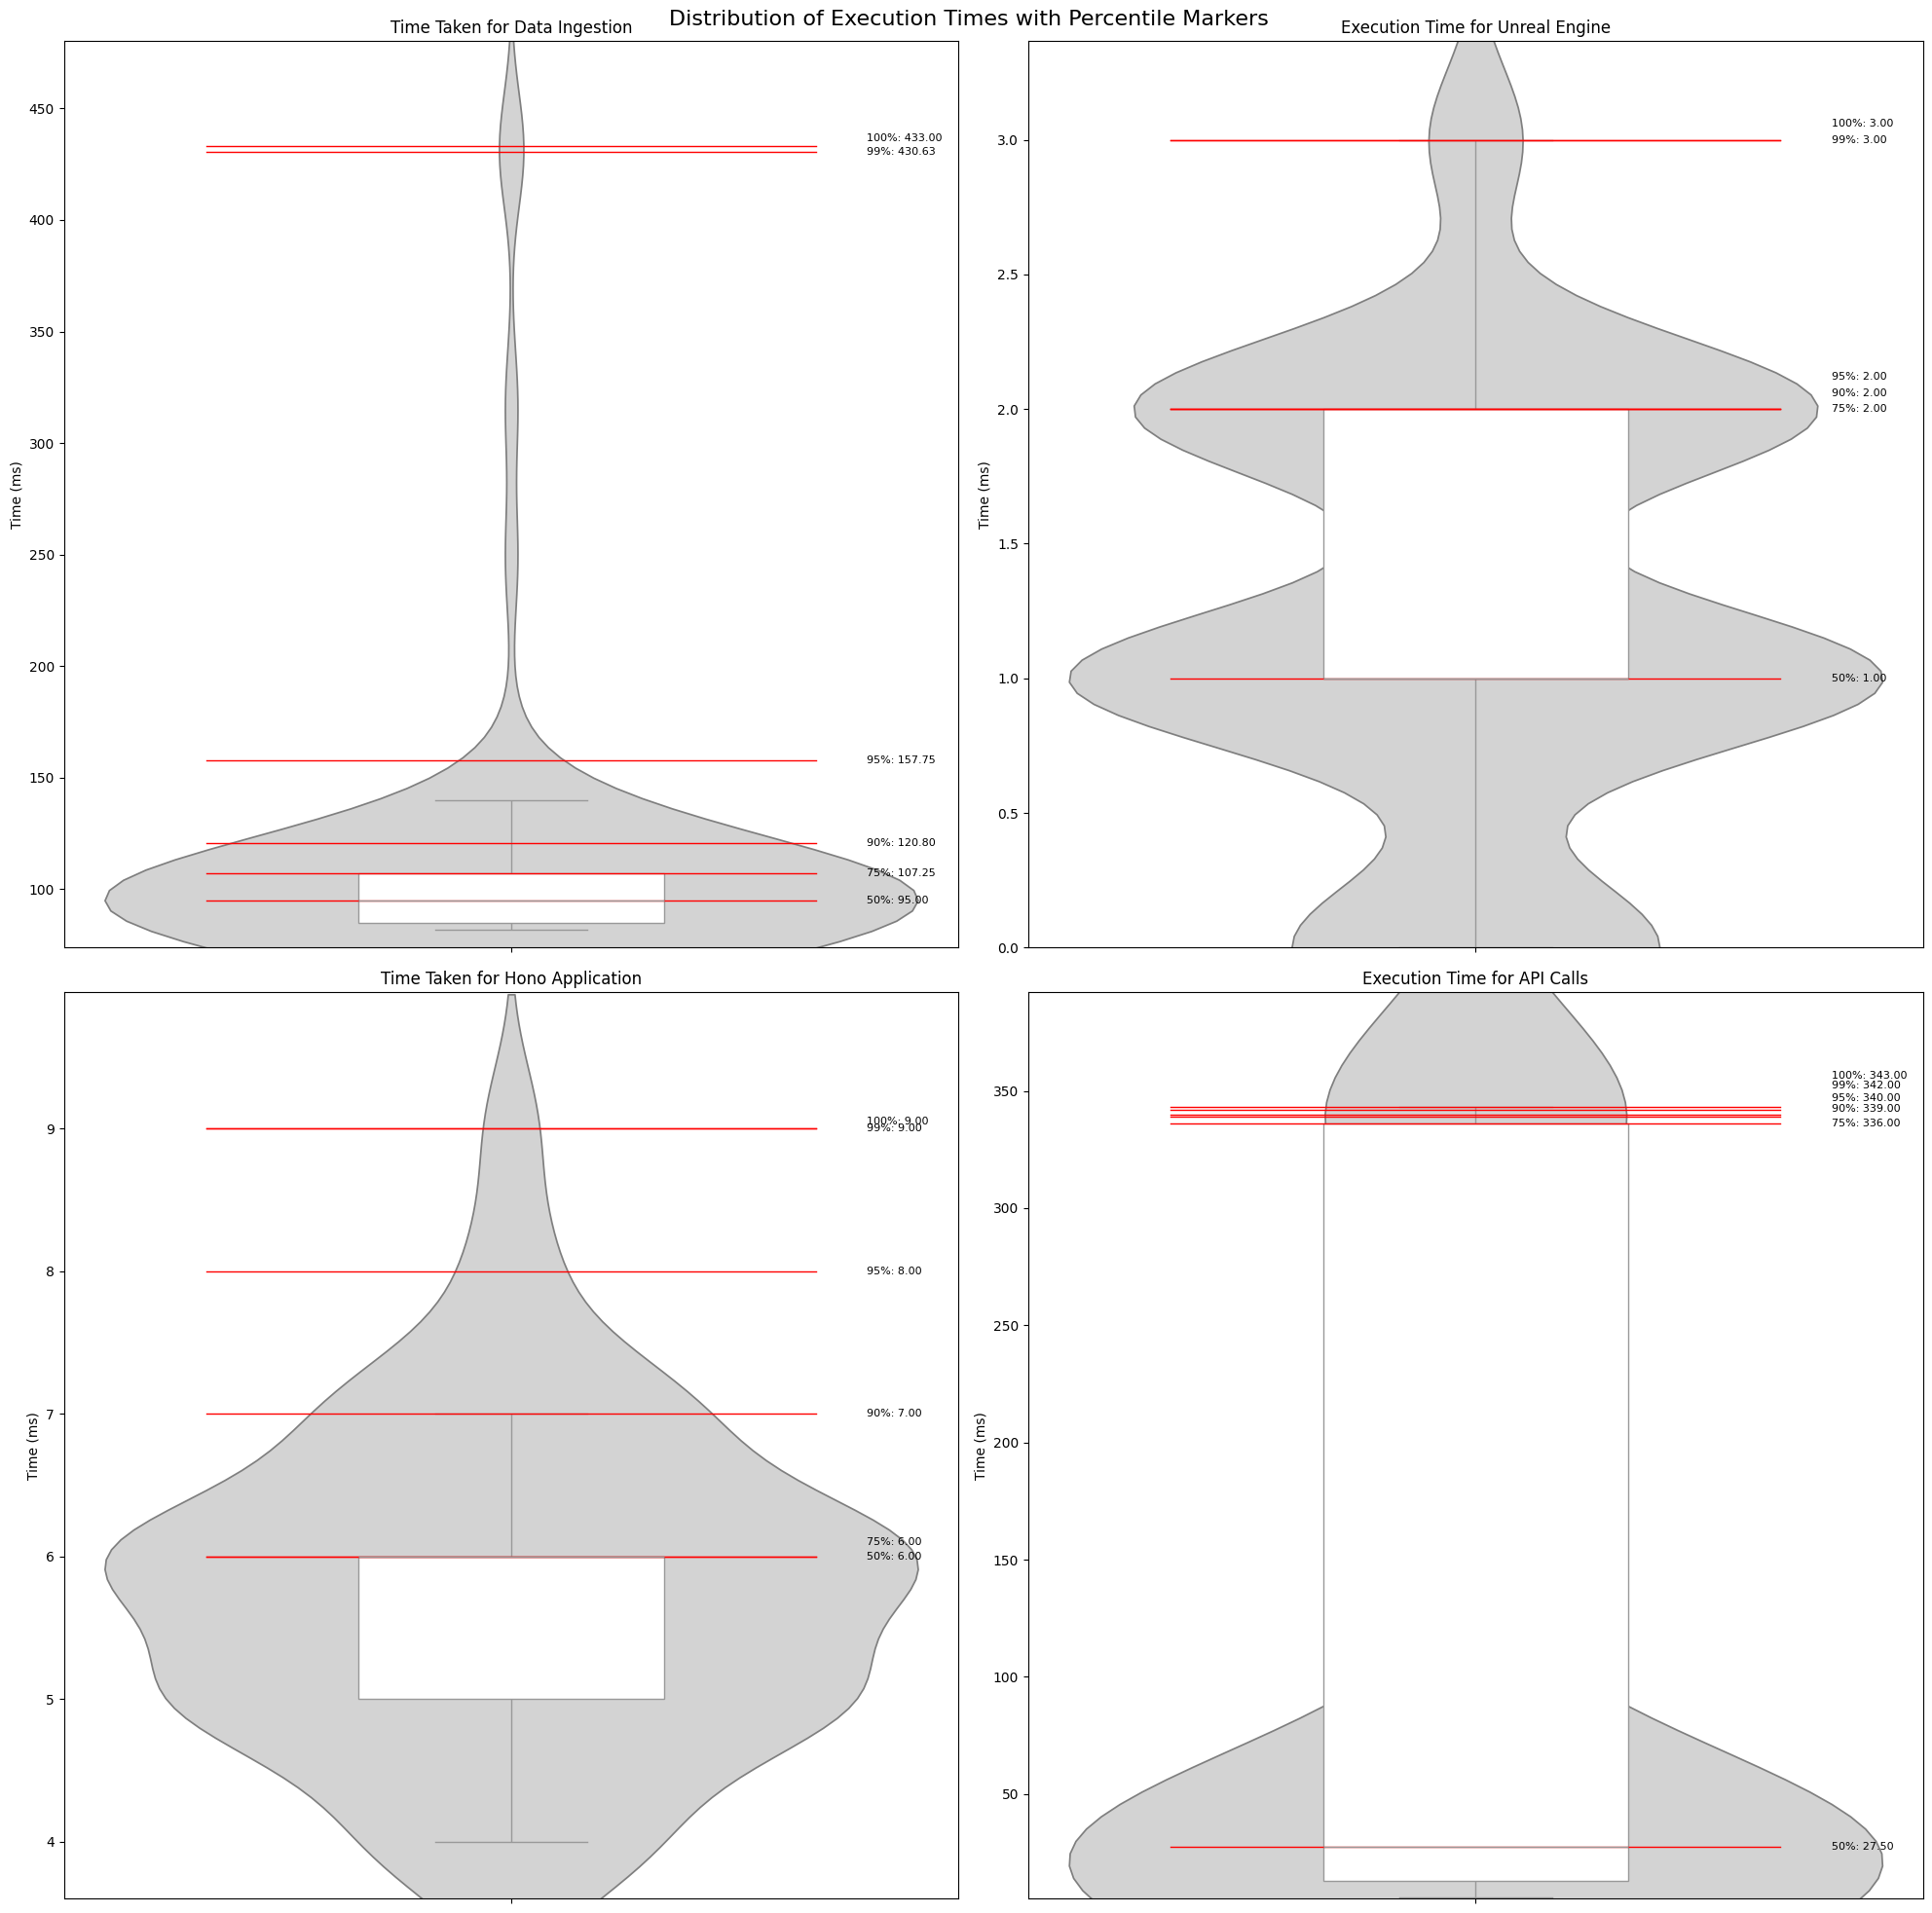

In [3]:
def plot_modified_boxplot(ax, data, title):
    # Calculate percentiles
    percentiles = [50, 75, 90, 95, 99, 100]
    perc_values = np.percentile(data, percentiles)
    
    # Create violin plot
    sns.violinplot(y=data, ax=ax, inner=None, color="lightgray")
    
    # Create box plot on top of violin plot
    sns.boxplot(y=data, ax=ax, width=0.3, color="white", saturation=0.5, showfliers=False)
    
    # Add percentile markers
    label_positions = []
    for perc, value in zip(percentiles, perc_values):
        ax.plot([-0.3, 0.3], [value, value], color='red', linewidth=1)
        label_positions.append(value)

    # Adjust label positions to prevent overlap
    min_distance = (max(data) - min(data)) * 0.01  # 5% of data range
    for i in range(1, len(label_positions)):
        while label_positions[i] - label_positions[i-1] < min_distance:
            label_positions[i] += min_distance

    # Add labels at adjusted positions
    for i, (perc, value) in enumerate(zip(percentiles, perc_values)):
        ax.text(0.35, label_positions[i], f'{perc}%: {value:.2f}', 
                verticalalignment='center', fontsize=8, ha='left')
    
    ax.set_title(title)
    ax.set_ylabel('Time (ms)')
    
    # Adjust y-axis limits to accommodate spread-out labels
    ax.set_ylim(min(data) * 0.9, max(label_positions) * 1.1)

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Distribution of Execution Times with Percentile Markers', fontsize=16)

# Plot for curl_times.csv
plot_modified_boxplot(axs[0, 0], curl_times_df['time_taken'], 'Time Taken for Data Ingestion')

# Plot for ExecutionTime.csv
plot_modified_boxplot(axs[0, 1], execution_time_df['exeution_time'], 'Execution Time for Unreal Engine')

# Plot for output.csv
plot_modified_boxplot(axs[1, 0], output_df['time_taken'], 'Time Taken for Hono Application')

# Plot for DataPollingTime.csv
plot_modified_boxplot(axs[1, 1], data_polling_df['exeution_time'], 'Execution Time for API Calls')

plt.tight_layout()
plt.show()

In [4]:
# Perform a left join on 'device_id' and 'value'
merged_df = pd.merge(curl_times_df, execution_time_df, on=['device_id', 'value'], how='left', suffixes=('_curl', '_execution'))

# Filter rows where 'exeution_time' is NaN, indicating no match in ExecutionTime.csv
unmatched_rows = merged_df[merged_df['exeution_time'].isna()]

pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
print("Data in curl_times.csv not found in ExecutionTime.csv:")
print(unmatched_rows)

Data in curl_times.csv not found in ExecutionTime.csv:
Empty DataFrame
Columns: [time_taken, device_id, value, exeution_time]
Index: []


The values above are the values athat have been called after the stoppage of the simulation or right before it started

In [5]:
for i in range(len(curl_times_df)):
    value = curl_times_df.iat[i, 2]  # 'value' is the 3rd column (index 2)
    if i % 8 == 7:  # This will be true for every 8th element (7th, 15th, 23rd, etc.)
        if value not in ['True', 'False']:
            print(f"Incorrect value at index {i}: {value} (Expected: True or False)")
    else:
        if value in ['True', 'False']:
            print(f"Unexpected boolean value at index {i}: {value} (Expected: not True or False)")

With the code above we see that there are not missing values from the unreal engine

With the above computation we also made sure that A=h expected/h measured = 1

In [6]:
# Perform a left join on 'device_id' and 'value'
merged_df = pd.merge(curl_times_df, execution_time_df, on=['device_id', 'value'], how='right', suffixes=('_curl', '_execution'))

# Filter rows where 'exeution_time' is NaN, indicating no match in ExecutionTime.csv
unmatched_rows = merged_df[merged_df['exeution_time'].isna()]

# Display the unmatched rows
print("Data in ExecutionTime.csv not found in curl_times.csv:")
print(unmatched_rows)

Data in ExecutionTime.csv not found in curl_times.csv:
Empty DataFrame
Columns: [time_taken, device_id, value, exeution_time]
Index: []


With the above calculations we see that R= u expected/u is exactly 1

In [7]:
def eliminate_extremes(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

curl_times_df = eliminate_extremes(curl_times_df, 'time_taken')
execution_time_df = eliminate_extremes(execution_time_df, 'exeution_time')
output_df = eliminate_extremes(output_df, 'time_taken')
data_polling_df = eliminate_extremes(data_polling_df, 'exeution_time')

# Calculate averages
curl_times_avg = curl_times_df['time_taken'].mean()
execution_time_avg = execution_time_df['exeution_time'].mean()
output_time_avg = output_df['time_taken'].mean()
data_polling_avg = data_polling_df['exeution_time'].mean()

# Sum of averages
total_avg = curl_times_avg + execution_time_avg + data_polling_avg

# Print averages
print(f"Average time_taken for data ingestion: {curl_times_avg}")
print(f"Average execution_time for Unreal Engine: {execution_time_avg}")
print(f"Average time_taken for data polling in Unreal Engine: {data_polling_avg}")
print(f"Average time_taken for hono application: {output_time_avg}")
print(f"Sum of averages: {total_avg}")

Average time_taken for data ingestion: 96.85333333333334
Average execution_time for Unreal Engine: 1.2573529411764706
Average time_taken for data polling in Unreal Engine: 105.44485294117646
Average time_taken for hono application: 5.592105263157895
Sum of averages: 203.55553921568628


With the above calculations we can see that with the forumla: T=Quantile(o,ϕ,t) T = 134 ms.

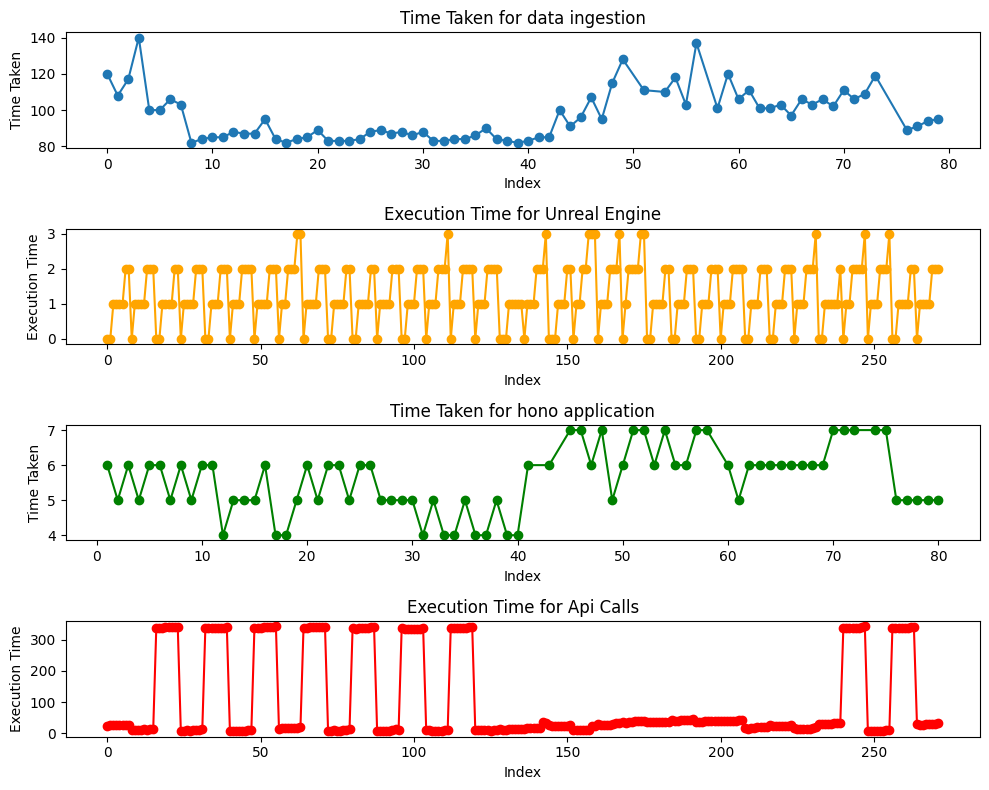

In [8]:
# Plotting the data
plt.figure(figsize=(10, 8))

# Plot for curl_times.csv
plt.subplot(4, 1, 1)
plt.plot(curl_times_df['time_taken'], marker='o')
plt.title('Time Taken for data ingestion')
plt.xlabel('Index')
plt.ylabel('Time Taken')

# Plot for ExecutionTime.csv
plt.subplot(4, 1, 2)
plt.plot(execution_time_df['exeution_time'], marker='o', color='orange')
plt.title('Execution Time for Unreal Engine')
plt.xlabel('Index')
plt.ylabel('Execution Time')

# Plot for output.csv
plt.subplot(4, 1, 3)
plt.plot(output_df['time_taken'], marker='o', color='green')
plt.title('Time Taken for hono application')
plt.xlabel('Index')
plt.ylabel('Time Taken')

# Plot for DataPollingTime.csv
plt.subplot(4, 1, 4)
plt.plot(data_polling_df['exeution_time'], marker='o', color='red')
plt.title('Execution Time for Api Calls')
plt.xlabel('Index')
plt.ylabel('Execution Time')


plt.tight_layout()
plt.show()

FOr the ODTE 
PT→DT=T×R×A = 134*1*1 = 134

Multithreading works until 1 sec, procedural works from half half second (0.05)